# Plotting


Import the LArray library:


In [1]:
from larray import *

Import the test array `population` from the `demography_eurostat` dataset:

In [2]:
demography_eurostat = load_example_data('demography_eurostat')
population = demography_eurostat.population / 1_000_000

# show the 'population' array
population

country  gender\time       2013       2014       2015       2016       2017
Belgium         Male   5.472856   5.493792   5.524068   5.569264   5.589272
Belgium       Female   5.665118   5.687048   5.713206   5.741853   5.762455
 France         Male  31.772665  32.045129  32.174258  32.247386  32.318973
 France       Female  33.827685  34.120851  34.283895  34.391005  34.485148
Germany         Male  39.380976  39.556923  39.835457  40.514123  40.697118
Germany       Female   41.14277   41.21054   41.36208  41.661561  41.824535

Inline matplotlib (required in notebooks):


In [3]:
%matplotlib inline

Create and show a simple plot (last axis define the different curves to draw):


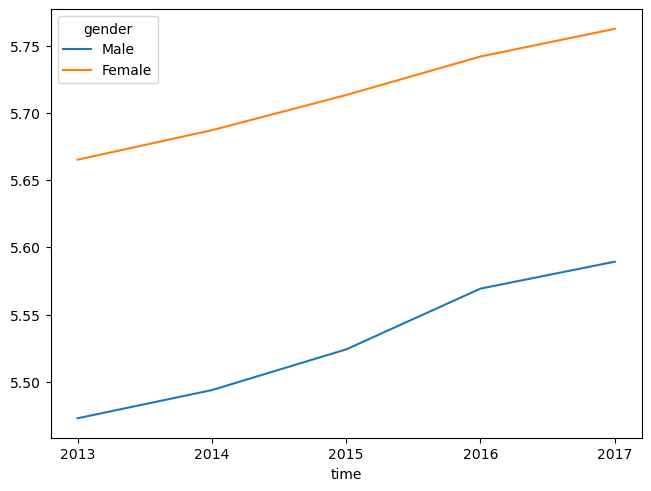

<Axes: xlabel='time'>

In [4]:
population['Belgium'].plot()

- Create a Line plot with grid, user-defined x ticks, y label and title. 
- Save the plot as a png file.
- and show it 

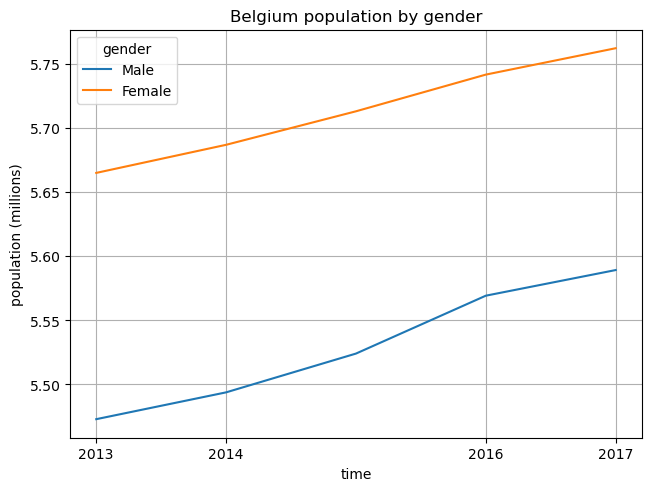

<Axes: title={'center': 'Belgium population by gender'}, xlabel='time', ylabel='population (millions)'>

In [5]:
population['Belgium'].plot(grid=True, 
                           xticks=[2013, 2014, 2016, 2017], 
                           ylabel='population (millions)', 
                           title='Belgium population by gender',
                           # saves figure in a file
                           filepath='Belgium_population.png',
                           # by default, when the plot is saved to a file, it is *not* shown
                           show=True)

Specify line styles and width:

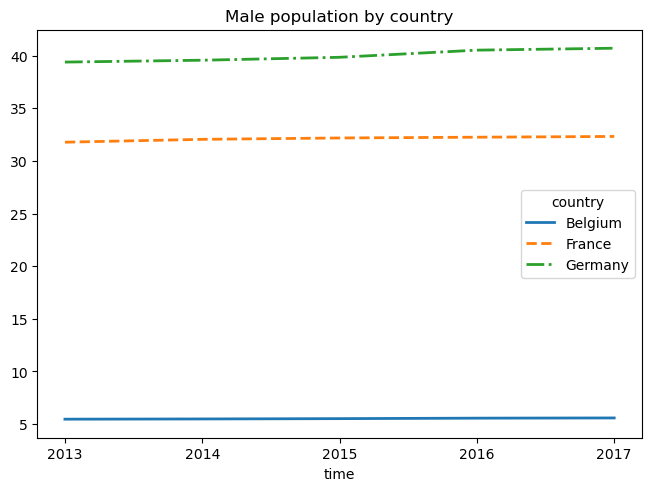

<Axes: title={'center': 'Male population by country'}, xlabel='time'>

In [6]:
# line styles: '-' for solid line, '--' for dashed line, '-.' for dash-dotted line and ':' for dotted line
population['Male'].plot(style=['-', '--', '-.'], 
                        linewidth=2, 
                        title='Male population by country')

Configuring the legend can be done by passing a dict to the legend argument. For example, to put the legend in a specific position inside the graph, one would use `legend={'loc': <position>}`.

Where `<position>` can be: 
 `'best'` (default), `'upper right'`, `'upper left'`, `'lower left'`, `'lower right'`, `'right'`, `'center left'`, `'center right'`, `'lower center'`, `'upper center'` or `'center'`.

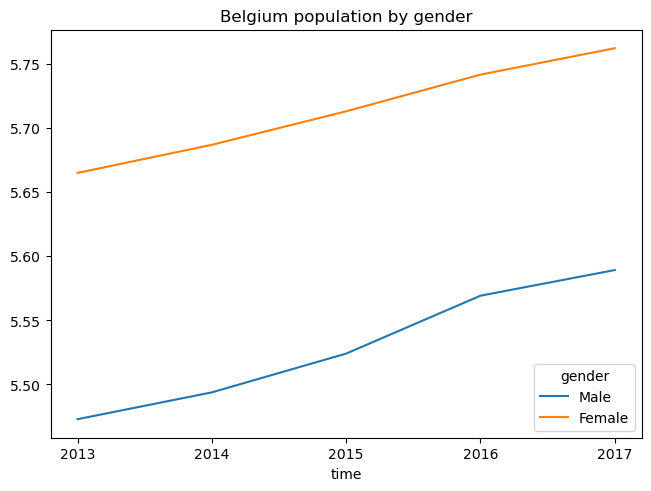

<Axes: title={'center': 'Belgium population by gender'}, xlabel='time'>

In [7]:
population['Belgium'].plot(title='Belgium population by gender', 
                           legend={'loc': 'lower right'})

There are many other ways to customize the legend, see the "Other parameters" section of [matplotlib's legend documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). For example, to put the legend outside the plot:

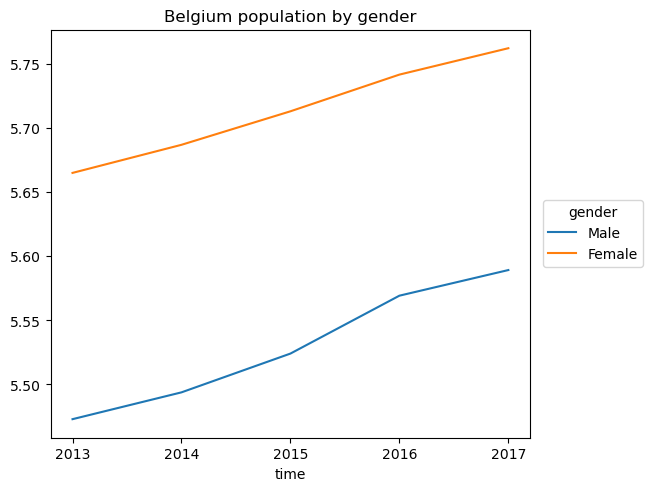

<Axes: title={'center': 'Belgium population by gender'}, xlabel='time'>

In [8]:
population['Belgium'].plot(title='Belgium population by gender', 
                           legend={'bbox_to_anchor': (1.25, 0.6)})

Create a Bar plot:

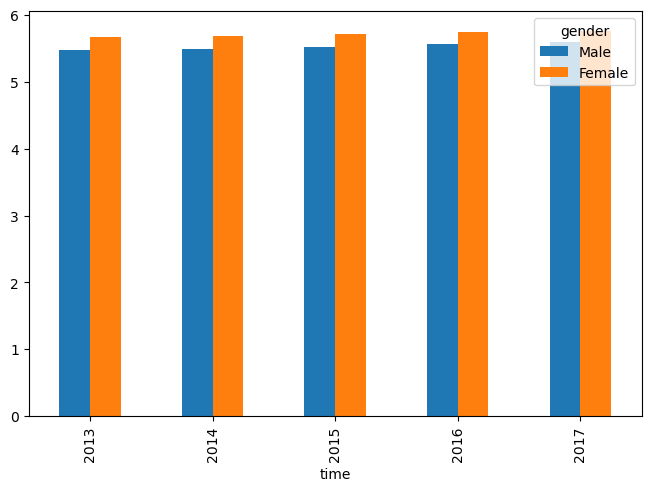

<Axes: xlabel='time'>

In [9]:
population['Belgium'].plot.bar()

Specify bounds for the y axis:

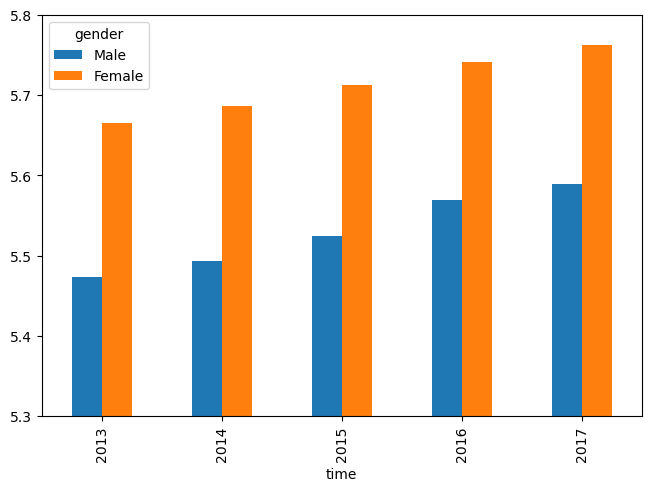

<Axes: xlabel='time'>

In [10]:
population['Belgium'].plot.bar(ylim=[5.3, 5.8])

Create a _stacked_ bar plot:

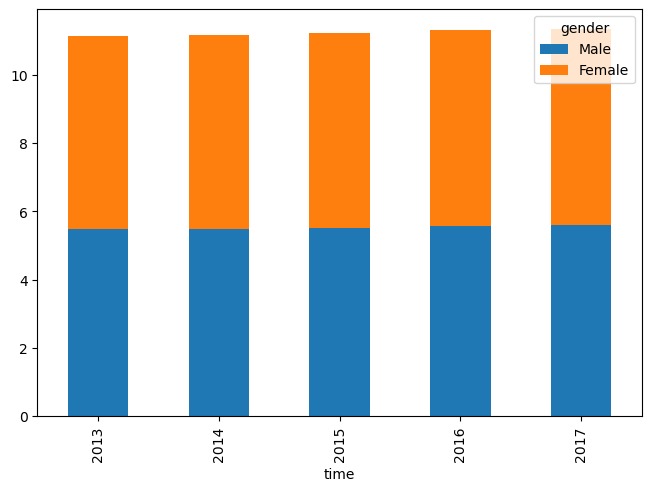

<Axes: xlabel='time'>

In [11]:
population['Belgium'].plot.bar(stack='gender')

Create a multiplot figure (using `subplots=axes`):

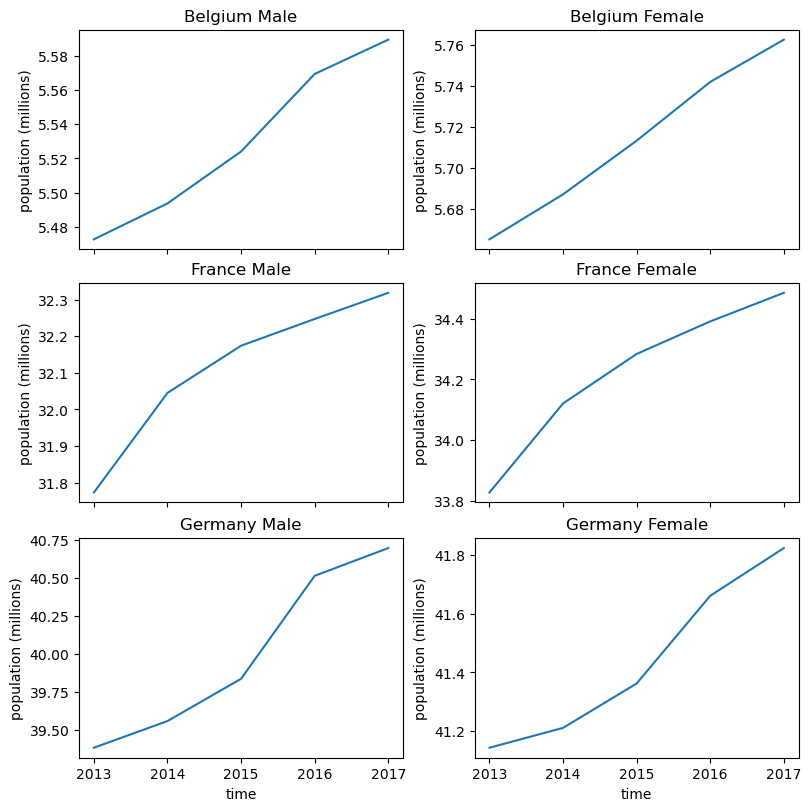

array([[ <Axes: title={'center': 'Belgium Male'}, xlabel='time', ylabel='population (millions)'>,
        <Axes: title={'center': 'Belgium Female'}, xlabel='time', ylabel='population (millions)'>],
       [ <Axes: title={'center': 'France Male'}, xlabel='time', ylabel='population (millions)'>,
        <Axes: title={'center': 'France Female'}, xlabel='time', ylabel='population (millions)'>],
       [ <Axes: title={'center': 'Germany Male'}, xlabel='time', ylabel='population (millions)'>,
        <Axes: title={'center': 'Germany Female'}, xlabel='time', ylabel='population (millions)'>]], dtype=object)

In [12]:
population.plot(subplots=('country', 'gender'),
                sharex=True,
                ylabel='population (millions)',
                figsize=(8, 8))

Let us now demonstrate heatmaps using some random data (because the population array does not lend itself well to heatmaps)

In [13]:
from larray.random import randint

In [14]:
random_data = randint(0, 100, axes='a=a0..a29;b=b0..b29')

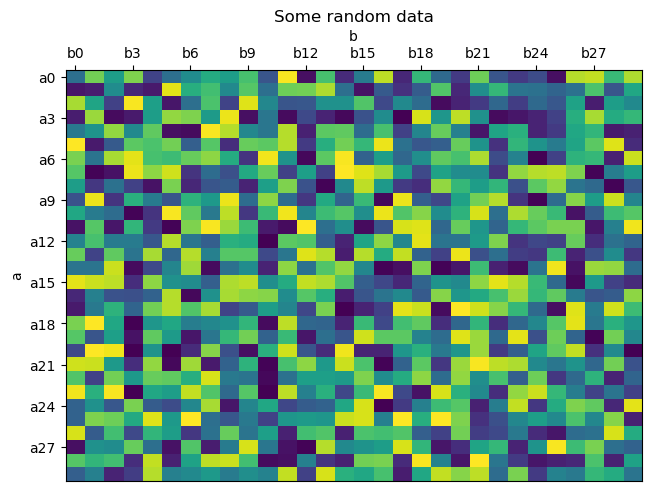

<Axes: title={'center': 'Some random data'}, xlabel='b', ylabel='a'>

In [15]:
random_data.plot.heatmap(title='Some random data')

For full control over plots, one can use Matplotlib API directly:

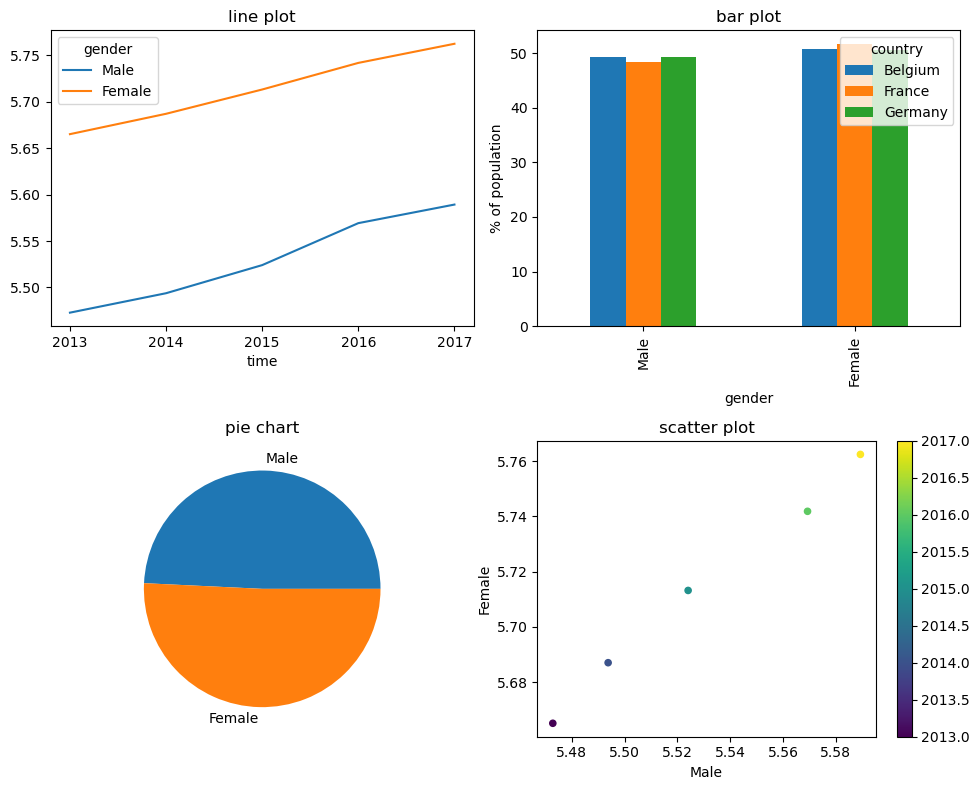

<Axes: title={'center': 'scatter plot'}, xlabel='Male', ylabel='Female'>

In [16]:
import matplotlib.pyplot as plt

# create a matplotlib figure with 4 subplots in a 2 rows/2 columns grid
fig, ax = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

# line plot with 2 curves (Males and Females) in the top left corner (ax=ax[0, 0])
# we do not want to see the plot yet, so we could specify show=False but this is not
# necassary because show is False by default if the ax argument is used.
population['Belgium'].plot(ax=ax[0, 0],
                           title='line plot')

# bar plot in the top right corner (0, 1)
population[2017].percent('gender').plot.bar(ax=ax[0, 1], 
                                            ylabel='% of population', 
                                            title='bar plot')

# pie chart in the bottom left corner (1, 0)
population['Belgium', 2017].plot.pie(ax=ax[1, 0], 
                                     title='pie chart')

# scatter plot in the bottom right corner (1, 1)
population['Belgium'].plot.scatter(ax=ax[1, 1], 
                                   x='Male', y='Female', 
                                   # using the year as color index
                                   c=population.time,
                                   # use a specific color map (otherwise we get a gray gradient)
                                   colormap='viridis',
                                   title='scatter plot',
                                   # since this is the last command to create our plot, we want to display it
                                   show=True)

See [plot](../_generated/larray.Array.plot.rst#larray.Array.plot) for more details and examples.

See [pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) for a short introduction to `matplotlib.pyplot`.